# Collaboration Assignment: Plotting
### Tyler Amos
#### November 13 2017

## 3. Plot

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
%matplotlib inline

'''
Data was acquired from Kaggle at this link: https://www.kaggle.com/aubertsigouin/biximtl/data

The visualization was created based on examples in Networkx documentation.
http://networkx.github.io

Additional reference materials used:
 - Pandas documentation;
 - Matplotlib documentation. 

'''
# Load data
stations = pd.read_csv("/Users/ty/Downloads/stations_2017.csv", sep = ";")

rides = pd.read_csv("/Users/ty/Downloads/OD_2017.csv", \
                    usecols = ['start_station_code', \
                    'end_station_code'], \
                    dtype = "category")

# Create a dictionary of stations mapping to their names
stations_dict = {}
for i, j in stations['code'].iteritems():
    if j not in stations_dict:
        stations_dict[j] = stations['name'][i]
        
# Create a dictionary of stations mapping to their coordinates
positions = {}        
for i, j in stations['name'].iteritems():
    if j not in positions:
        positions[j] = (stations['longitude'][i], stations['latitude'][i])

In [5]:
# Clean the data.
rides = rides[rides['end_station_code'] != 'Tabletop (RMA)']

# Match station codes to names
new_list = []
for i, j in rides['start_station_code'].iteritems():
    new_list.append(stations_dict[int(j)])
rides['start_name'] = new_list
new_list = []
for i, j in rides['end_station_code'].iteritems():
    new_list.append(stations_dict[int(j)])
rides['end_name'] = new_list

# Create a list of trips (edges) with start and end stations
rides['as_tuple'] = list(zip(rides['start_name'], rides['end_name']))


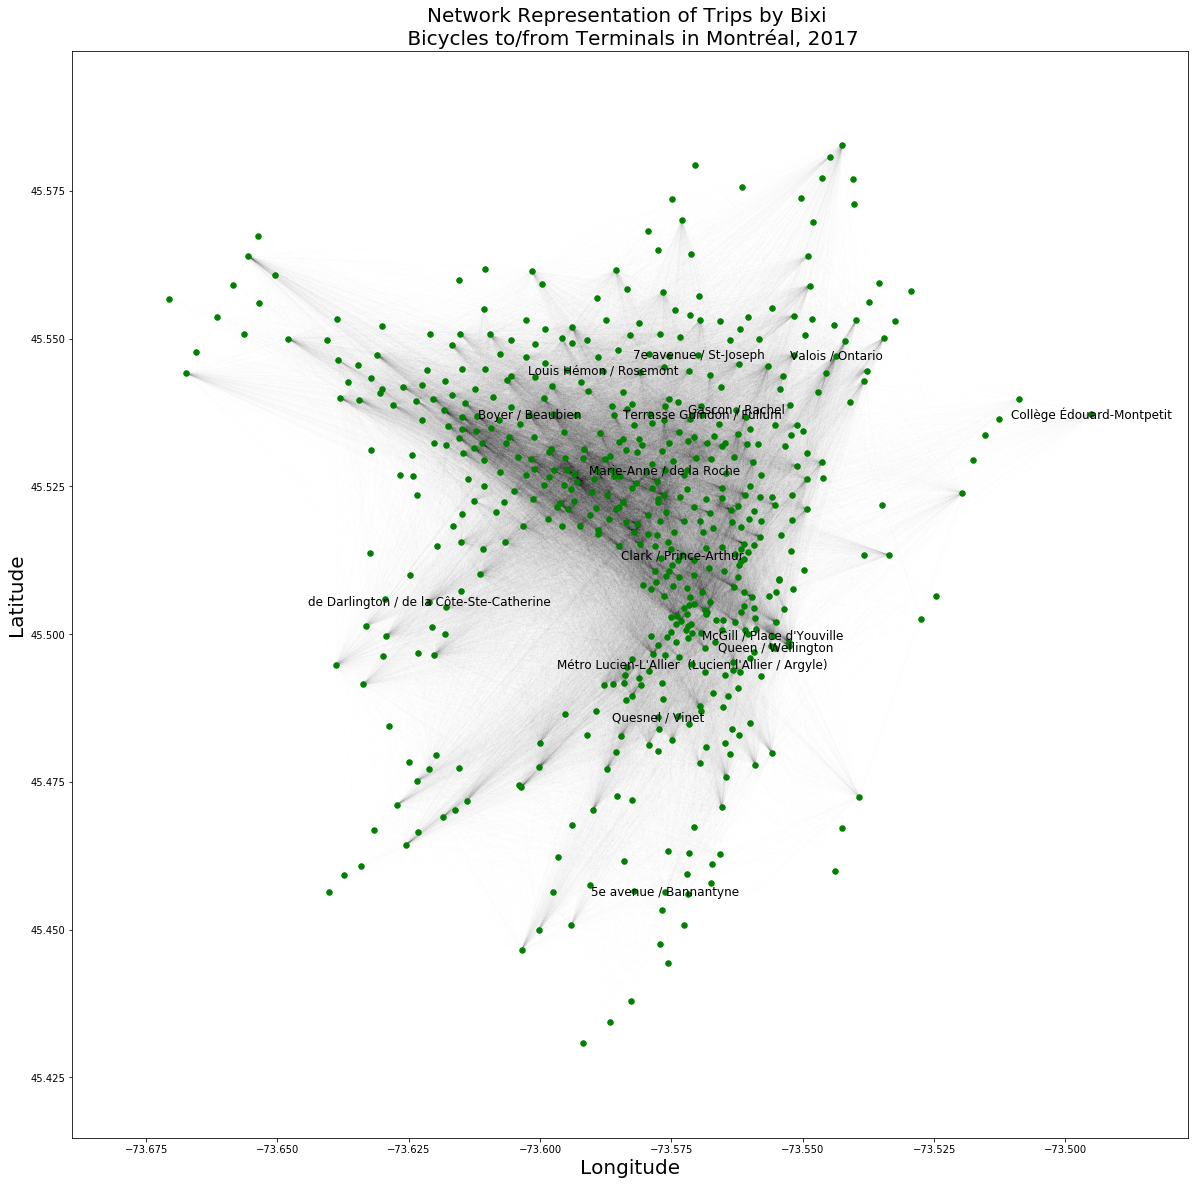

In [10]:
# Create a graph with stations as nodes and trips as edges
nwk = nx.Graph()
for i in stations['name']:
    nwk.add_node(i, pos = positions[i])
for i in rides['as_tuple']:
    nwk.add_edge(i[0], i[1])
    
# Choose some stations at random to label
random.seed(123)
named_stations = random.sample(list(stations['name']), 15)
label_list = {}    
for node in nwk.nodes():
    if node in named_stations:
        label_list[node] = node

# Put the plot together and add axis labels, etc.
pos=nx.get_node_attributes(nwk,'pos')
nx.draw_networkx(nwk, pos, node_color = 'green', edge_color = 'black', width = 0.001, node_size = 30, with_labels = False)
nx.draw_networkx_labels(nwk, pos, label_list, fontsize = .5)
plt.rcParams["figure.figsize"] = [20,20]
plt.title("Network Representation of Trips by Bixi \n Bicycles to/from Terminals in Montréal, 2017", fontsize = 20)
plt.xlabel("Longitude", fontsize = 20)
plt.ylabel("Latitude", fontsize = 20)
plt.savefig("TAMOS_Collaboration_Plot.png")
plt.show()
'''
NOTE: Due to Jupyter notebook limitations, please run the code in this block **twice** 
to ensure the image renders appropriately. 
''';

### Discussion:
This plot highlights several interesting features of the Bixi dataset. First, because the nodes (stations) are plotted with their geographic coordinates, we can easily identify a core Bixi area, which, being beside a large circular gap (which corresponds to the Mount Royale park), is easily identified as the Plateau Mont Royale neighborhood. The striations across this area suggest it is the primary Bixi use area (which is confirmed by the fact that several of Montréal's most-used north-south streets (e.g., Avenue St Laurent, St. Dénis, Berri, Papineau etc.) all cross through that area. Other striations can be noted running east-west, which also align with the location of the Sherbrooke/Ontario streets corridor. Furthermore, we can see that edges (trips) which start in the periphery are usually connected to core nodes, suggesting that Bixi travel is used mostly to enter or leave the core and not to travel between periphery areas. 